In [2]:
# MS OpenHack, May 22, Beijing.
#
# Case 1: Create a model in Custome Vision and make it as a web service. Call RESTful API to clarify a pic.
# 
# https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/6800c76e-c359-4866-9a6d-0c3ec33fe7be/url?iterationId=599bcc73-6bac-4c68-a900-7f5dbcb2a645
# Set Prediction-Key Header to : 90363b49d0d24017a34c4072f0218f56
# Set Content-Type Header to : application/json
# Set Body to : {"Url": "https://example.com/image.png"}

import requests
import json

url = 'https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/6800c76e-c359-4866-9a6d-0c3ec33fe7be/url?iterationId=599bcc73-6bac-4c68-a900-7f5dbcb2a645'
headers = {
    'Prediction-Key': '90363b49d0d24017a34c4072f0218f56',
    'Content-Type': 'application/json'
}
body = {"Url": "http://images.esellerpro.com/2296/I/317/696/condor_aegis_blk_1.jpg"}

rsp = requests.post(url, json.dumps(body), headers=headers)
result = json.loads(rsp.text)
print(result)
print("")

best_score = 0
prediction = 'None'
for predict in result['predictions']:
    if predict['probability'] > best_score:
        prediction = predict['tagName']
        best_score = predict['probability']
    print('The probability of tag {0} is {1}'.format(predict['tagName'], predict['probability']))

print("")
print("~~~~~~~~~~~~~~~~~~~~")
print("This picture is belong to {} ".format(prediction))

{'id': '2efcb7e6-8228-4ae9-bd93-f57e89ccdbba', 'project': '6800c76e-c359-4866-9a6d-0c3ec33fe7be', 'created': '2018-05-22T05:22:36.9571783Z', 'iteration': '599bcc73-6bac-4c68-a900-7f5dbcb2a645', 'predictions': [{'probability': 0.990154266, 'tagId': '12224721-47ed-41a1-943e-23c4b0e90c65', 'tagName': 'Jackets'}, {'probability': 0.0110482564, 'tagId': 'ad06803c-2c0e-4980-81bf-9bb8ad84cccb', 'tagName': 'Gloves'}, {'probability': 0.000216540342, 'tagId': '448629a0-3805-4537-ab5c-0b845e323275', 'tagName': 'Helmets'}, {'probability': 0.000103220373, 'tagId': 'e1660d52-62db-48a1-aada-b74e36461766', 'tagName': 'Boots'}]}

The probability of tag Jackets is 0.990154266
The probability of tag Gloves is 0.0110482564
The probability of tag Helmets is 0.000216540342
The probability of tag Boots is 0.000103220373

~~~~~~~~~~~~~~~~~~~~
This picture is belong to Jackets 


In [20]:
# Case 2: Data pre-processing: Resize and Normolization

from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image_path = '13316276271.png'
img=Image.open(image_path)


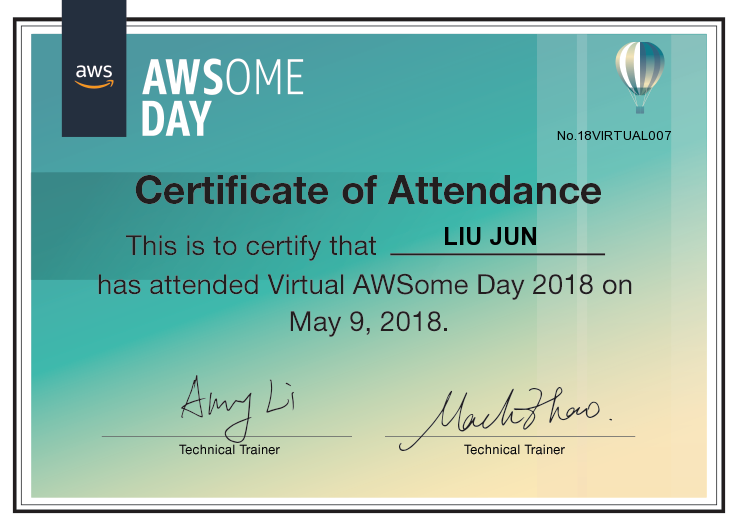

In [21]:
img

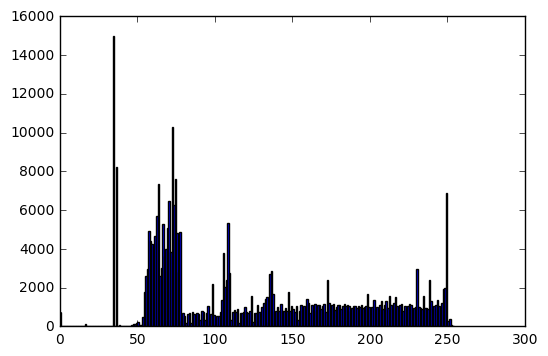

In [22]:
plt.hist(np.asarray(img)[:,:,0].ravel(), 254, [0, 254]);
plt.show()

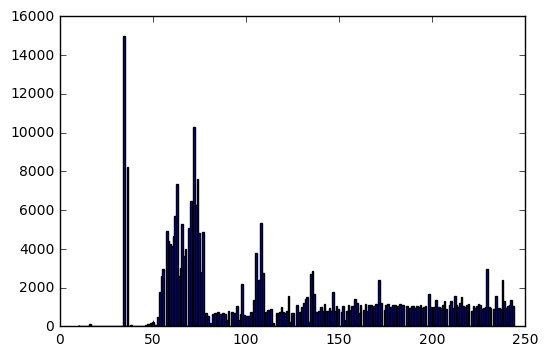

In [23]:
plt.hist(np.asarray(img)[:,:,0].ravel(), 254, [10, 244]);
plt.show()

In [24]:
def normalize(arr):
    
    arr = arr.astype('float')
    for i in range(3):
        minval = arr[:, :, i].min()
        maxval = arr[:, : ,i].max()
        if minval != maxval or not (minval ==0 and maxval == 255):
            arr[:, :, i] -= minval
            arr[:, :, i] *= (255.0/(maxval-minval))
    new_img = Image.fromarray(arr.astype('uint8'),'RGB')
    return new_img

def resize(img):
    img_w, img_h = img.size
    mx_shape  = max(img_w, img_h)
    background = Image.new('RGB', (mx_shape, mx_shape), (255, 255, 255))
    bg_w, bg_h = background.size
    offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
    background.paste(img, offset)
    re_img = background.resize((128, 128), Image.ANTIALIAS)
    return re_img

def normalize_and_resize(image_path):
    img = Image.open(image_path)
    img = resize(img)
    arr = np.array(img)
    arr = normalize(arr)
    #arr = equilize(arr)
    return arr

converted_img = normalize_and_resize(image_path)

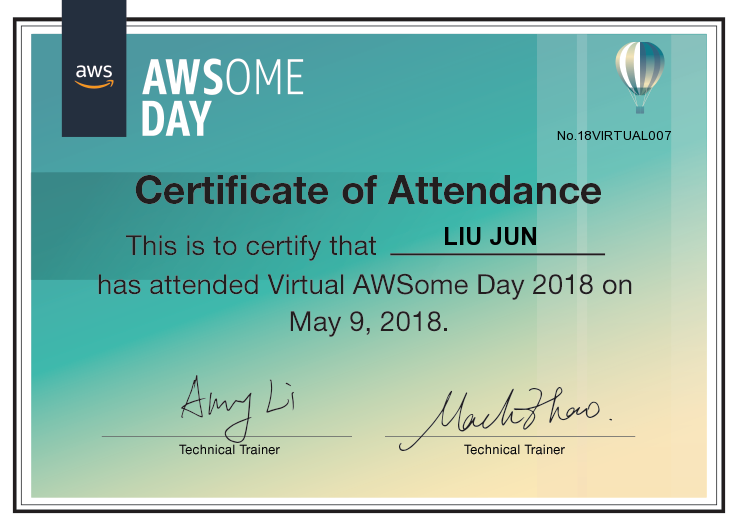

In [25]:
img = Image.open(image_path)
img

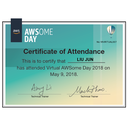

In [26]:
img = resize(img)
img

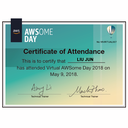

In [27]:
arr = np.array(img)
arr = normalize(arr)
arr

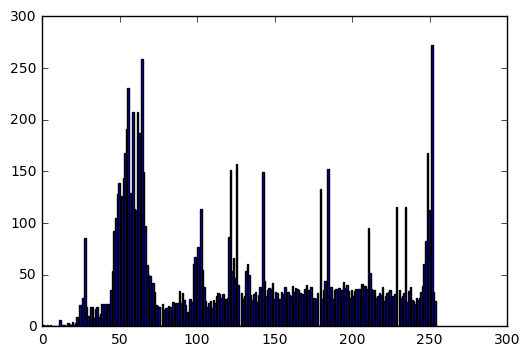

In [28]:
plt.hist(np.asarray(converted_img)[:,:,0].ravel(), 254, [0, 254]);
plt.show()

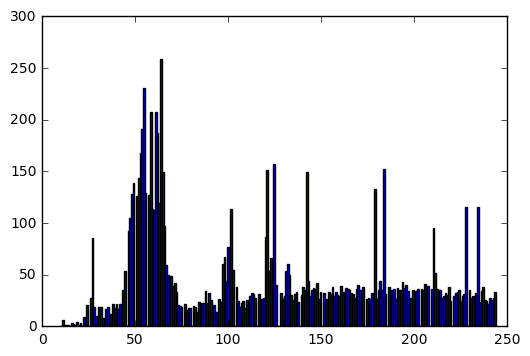

In [29]:
plt.hist(np.asarray(converted_img)[:,:,0].ravel(), 254, [10, 244]);
plt.show()